##  IoU 구하기

#### selectivesearch 패키지를 설치 ([selectivesearch github](https://github.com/AlpacaDB/selectivesearch))

In [5]:
!pip install selectivesearch

#### 실습에 사용할 이미지 불러오기

In [6]:
# content 디렉터리 아래 data 폴더 생성
!mkdir /content/data
# data 디렉터리 아래 audrey01.jpg라는 이름으로 오드리햅번 이미지 다운로드받기
!wget -O /content/data/audrey01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/audrey01.jpg

--2022-01-19 14:34:48--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/audrey01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30102 (29K) [image/jpeg]
Saving to: ‘/content/data/audrey01.jpg’

/content/data/audre 100%[===================>]  29.40K  --.-KB/s    in 0.001s  

2022-01-19 14:34:48 (30.8 MB/s) - ‘/content/data/audrey01.jpg’ saved [30102/30102]



## IoU 구하기

#### 입력인자로 예측 경계 상자와 실제 경계 상자를 받아서 IoU를 계산하는 함수 생성

In [7]:
import numpy as np 

def compute_iou(pred_box, gt_box):
    # 교집합 좌표 계산 ---①
    x1 = np.maximum(pred_box[0], gt_box[0])
    y1 = np.maximum(pred_box[1], gt_box[1])
    x2 = np.minimum(pred_box[2], gt_box[2])
    y2 = np.minimum(pred_box[3], gt_box[3])
    # 교집합 영역 넓이 ---②
    intersection = np.maximum(x2 - x1, 0) * np.maximum(y2 - y1, 0)
    # 예측 경계 상자 넓이 ---③
    pred_box_area = (pred_box[2] - pred_box[0]) * (pred_box[3] - pred_box[1])
    # 실제 경계 상자 넓이 ---④
    gt_box_area = (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1])
    # 합집합 영역 넓이 ---⑤
    union = pred_box_area + gt_box_area - intersection
    
    iou = intersection / union # IOU 계산
    return iou

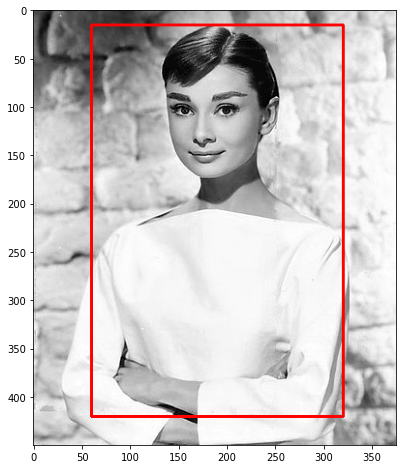

In [13]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# 실제 경계 상자의 좌표가 다음과 같다고 가정 
gt_box = [60, 15, 320, 420]

img = cv2.imread('./data/audrey01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

red = (255, 0, 0) # 실제 경계 상자 색상
img_rgb = cv2.rectangle(img_rgb, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), color=red, thickness=2)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb);

In [14]:
import selectivesearch

img = cv2.imread('./data/audrey01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
_, regions = selectivesearch.selective_search(img_rgb, scale=100, min_size=2000)

<class 'list'> 41


In [ ]:
import selectivesearch

img = cv2.imread('./data/audrey01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
_, regions = selectivesearch.selective_search(img_rgb, scale=100, min_size=2000)

[(0, 0, 107, 167),
 (15, 0, 129, 110),
 (121, 0, 253, 133),
 (134, 17, 73, 62),
 (166, 23, 87, 176),
 (136, 53, 88, 121),
 (232, 79, 117, 147),
 (50, 91, 133, 123),
 (305, 97, 69, 283),
 (0, 161, 70, 46),
 (72, 171, 252, 222),
 (0, 181, 118, 85),
 (106, 210, 89, 101),
 (302, 228, 66, 96),
 (0, 253, 92, 134),
 (153, 270, 173, 179),
 (0, 305, 47, 139),
 (104, 312, 80, 71),
 (84, 360, 91, 67),
 (0, 362, 171, 87),
 (297, 364, 77, 85),
 (0, 91, 183, 175),
 (136, 23, 117, 176),
 (72, 171, 254, 278),
 (134, 17, 119, 182),
 (302, 97, 72, 283),
 (121, 0, 253, 226),
 (0, 91, 183, 175),
 (0, 0, 144, 167),
 (0, 0, 253, 199),
 (0, 253, 92, 191),
 (0, 91, 183, 353),
 (0, 171, 326, 278),
 (0, 97, 374, 352),
 (84, 312, 100, 115),
 (0, 91, 184, 353),
 (0, 91, 195, 353),
 (0, 0, 374, 444),
 (0, 0, 374, 449),
 (0, 0, 374, 449),
 (0, 0, 374, 449)]

In [15]:
import selectivesearch

img = cv2.imread('./data/audrey01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
_, regions = selectivesearch.selective_search(img_rgb, scale=100, min_size=2000)

rects = [region['rect'] for region in regions] # 에측 경계 상자 좌표

for index, pred_box in enumerate(rects):
    pred_box = list(pred_box)
    width, height = pred_box[2], pred_box[3] # 너비, 높이
    # 예측 경계 상자의 우상단 좌표 구하기 ---①
    pred_box[2] = pred_box[0] + width
    pred_box[3] = pred_box[1] + height
    
    iou = compute_iou(pred_box, gt_box)
    print('index:', index, "iou:", iou)

index: 0 iou: 0.06157293686705451
index: 1 iou: 0.07156308851224105
index: 2 iou: 0.2033654637255666
index: 3 iou: 0.04298195631528965
index: 4 iou: 0.14541310541310543
index: 5 iou: 0.10112060778727446
index: 6 iou: 0.11806905615946989
index: 7 iou: 0.1420163334272036
index: 8 iou: 0.035204259342190375
index: 9 iou: 0.004256894317971497
index: 10 iou: 0.5184766640298338
index: 11 iou: 0.04465579710144928
index: 12 iou: 0.0853656220322887
index: 13 iou: 0.015722240419259743
index: 14 iou: 0.037833068643021
index: 15 iou: 0.22523535071077264
index: 16 iou: 0.0
index: 17 iou: 0.053941120607787274
index: 18 iou: 0.05154006626579948
index: 19 iou: 0.05660327592118798
index: 20 iou: 0.01165009904393209
index: 21 iou: 0.18588082901554404
index: 22 iou: 0.19555555555555557
index: 23 iou: 0.5409250175192712
index: 24 iou: 0.205679012345679
index: 25 iou: 0.042245111210628454
index: 26 iou: 0.34848824374009246
index: 27 iou: 0.18588082901554404
index: 28 iou: 0.10952135872362326
index: 29 iou: 

img shape: (450, 375, 3)
인덱스: 3 IoU 값: 0.5184766640298338 예측 경계 상자 좌표: (72, 171, 324, 393)
인덱스: 7 IoU 값: 0.5409250175192712 예측 경계 상자 좌표: (72, 171, 326, 449)
인덱스: 17 IoU 값: 0.5490037131949166 예측 경계 상자 좌표: (0, 97, 374, 449)
인덱스: 20 IoU 값: 0.6341234282410753 예측 경계 상자 좌표: (0, 0, 374, 444)
인덱스: 21 IoU 값: 0.6270619201314865 예측 경계 상자 좌표: (0, 0, 374, 449)
인덱스: 22 IoU 값: 0.6270619201314865 예측 경계 상자 좌표: (0, 0, 374, 449)
인덱스: 23 IoU 값: 0.6270619201314865 예측 경계 상자 좌표: (0, 0, 374, 449)


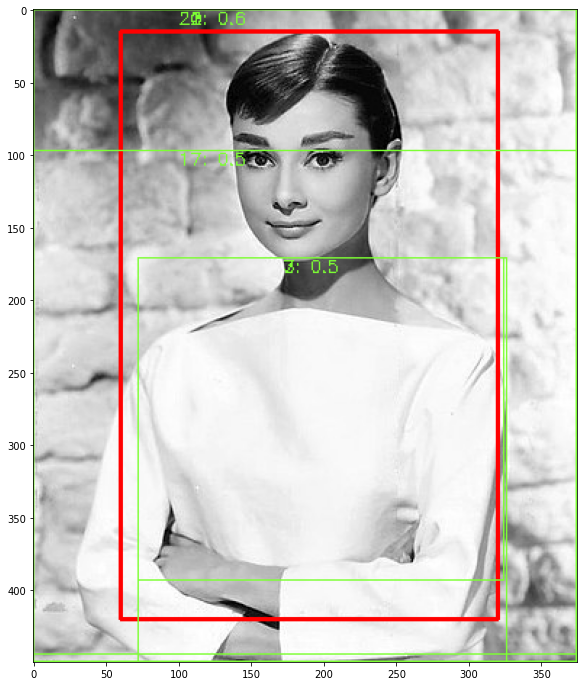

In [27]:
img = cv2.imread('./data/audrey01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:', img.shape)

green = (125, 255, 51) # 예측 경계 상자 색상
# 크기가 10000보다 큰 경계 상자만 추출
rects = [region['rect'] for region in regions if region['size'] > 10000]
gt_box = [60, 15, 320, 420]

img_rgb = cv2.rectangle(img_rgb, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), color=red, thickness=2)

for index, pred_box in enumerate(rects):
    pred_box = list(pred_box)
    width, height = pred_box[2], pred_box[3] # 너비, 높이
    # 예측 경계 상자의 우상단 좌표 구하기
    pred_box[2] = pred_box[0] + width
    pred_box[3] = pred_box[1] + height
    
    iou = compute_iou(pred_box, gt_box)
    
    if iou > 0.5: # IoU가 0.5보다 큰 경계 상자만 표시 ---①
        print('인덱스:', index, "IoU 값:", iou, '예측 경계 상자 좌표:',(pred_box[0], pred_box[1], pred_box[2], pred_box[3]) )
        cv2.rectangle(img_rgb, (pred_box[0], pred_box[1]), (pred_box[2], pred_box[3]), color=green, thickness=1)
        text = "{}: {:.1f}".format(index, iou)
        cv2.putText(img_rgb, text, (pred_box[0]+ 100, pred_box[1]+10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, color=green, thickness=1)
    
plt.figure(figsize=(12, 12))
plt.imshow(img_rgb);    